In [1]:
# Data analysis & wrangling
import numpy as np # linear algebra
import pandas as pd # data processing
import random as rnd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# ML
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import (
    train_test_split, 
    cross_validate, 
    cross_val_score, 
    StratifiedShuffleSplit, 
    GridSearchCV
)

from sklearn.dummy import DummyClassifier
from sklearn.metrics import (
    accuracy_score,
    roc_curve,
    roc_auc_score,
    mean_squared_error,
    confusion_matrix,
    ConfusionMatrixDisplay,
    plot_confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    log_loss,
    auc,
    plot_roc_curve, 
    roc_curve
)

from sklearn.preprocessing import (
    LabelEncoder, 
    OneHotEncoder,
    RobustScaler,
    StandardScaler,
    MinMaxScaler,
    OrdinalEncoder, 
    Binarizer, 
    PolynomialFeatures
)

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import dataset
data = pd.read_csv("train.csv")

In [3]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(891, 12)

In [4]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
# get a list of the features within the dataset
print(data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [6]:
# statistic information of dataset
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Dataset description

PassengerId - a unique ID to each passenger(1-891); Survived - a boolean variable: 1 - Survived, 0 - Dead; Pclass - ticket Class: 1 - 1st, 2 - 2nd, 3 - 3rd class; Name - passenger name Sex - sex of passenger Age - age (in years) SibSp - number of siblings(brother/sister)/spouses(wife/husband) aboard Parch - number of parents/children aboard Ticket - a ticket number Fare - passenger fare Cabin - cabin number Embarked - port of embarkation (C - Cherbourg, Q - Queenstown, S - Southampton)

Numerical Features: Age (continuous), Fare (continuous), SibSp (discrete), Parch (discrete) Categorical Features: Survived, Sex, Embarked, Pclass Alphanumeric Features: Ticket, Cabin

# EDA

In [7]:
# count number of distinct elements
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [8]:
# check the missing values
data.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

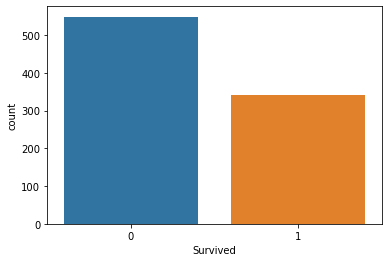

In [9]:
# number of surviving/non-surviving passengers
survival = pd.DataFrame(data["Survived"].value_counts())
survival.index = ["Not_survived", "Survived"]
# survival.plot.bar();
sns.countplot(x="Survived", data=data)

In [10]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [11]:
# proportion of surviving 1st class passengers with regards to the total number of 1st class passengers
data[['Pclass', 'Survived']].groupby(
    ['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [12]:
data[data['Pclass'] == 1]['Survived'].value_counts()

1    136
0     80
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

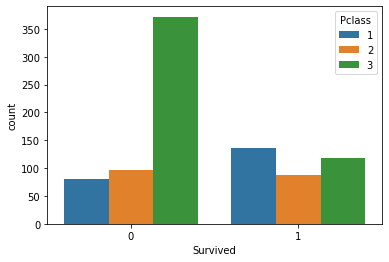

In [13]:
sns.countplot(x="Survived", hue="Pclass", data=data)

,Sex,Survived
0,female,0.742038
1,male,0.188908


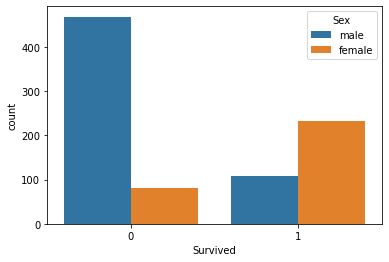

In [14]:
sns.countplot(x="Survived", hue="Sex", data=data)
data.groupby('Sex', as_index=False).Survived.mean()

In [15]:
# info on male/female survived/dead passengers with regards to the class
for cls in sorted(data['Pclass'].unique()):
    print('Class', cls)
    for sex in data['Sex'].unique():
        if sex == 'male':
            print('Info about the male passengers')
        else:
            print('Info about the female passengers')
        print(data[(data['Sex'] == sex) & (data['Pclass'] == cls)]
              ['Survived'].value_counts())
        print()

Class 1
Info about the male passengers
0    77
1    45
Name: Survived, dtype: int64

Info about the female passengers
1    91
0     3
Name: Survived, dtype: int64

Class 2
Info about the male passengers
0    91
1    17
Name: Survived, dtype: int64

Info about the female passengers
1    70
0     6
Name: Survived, dtype: int64

Class 3
Info about the male passengers
0    300
1     47
Name: Survived, dtype: int64

Info about the female passengers
1    72
0    72
Name: Survived, dtype: int64



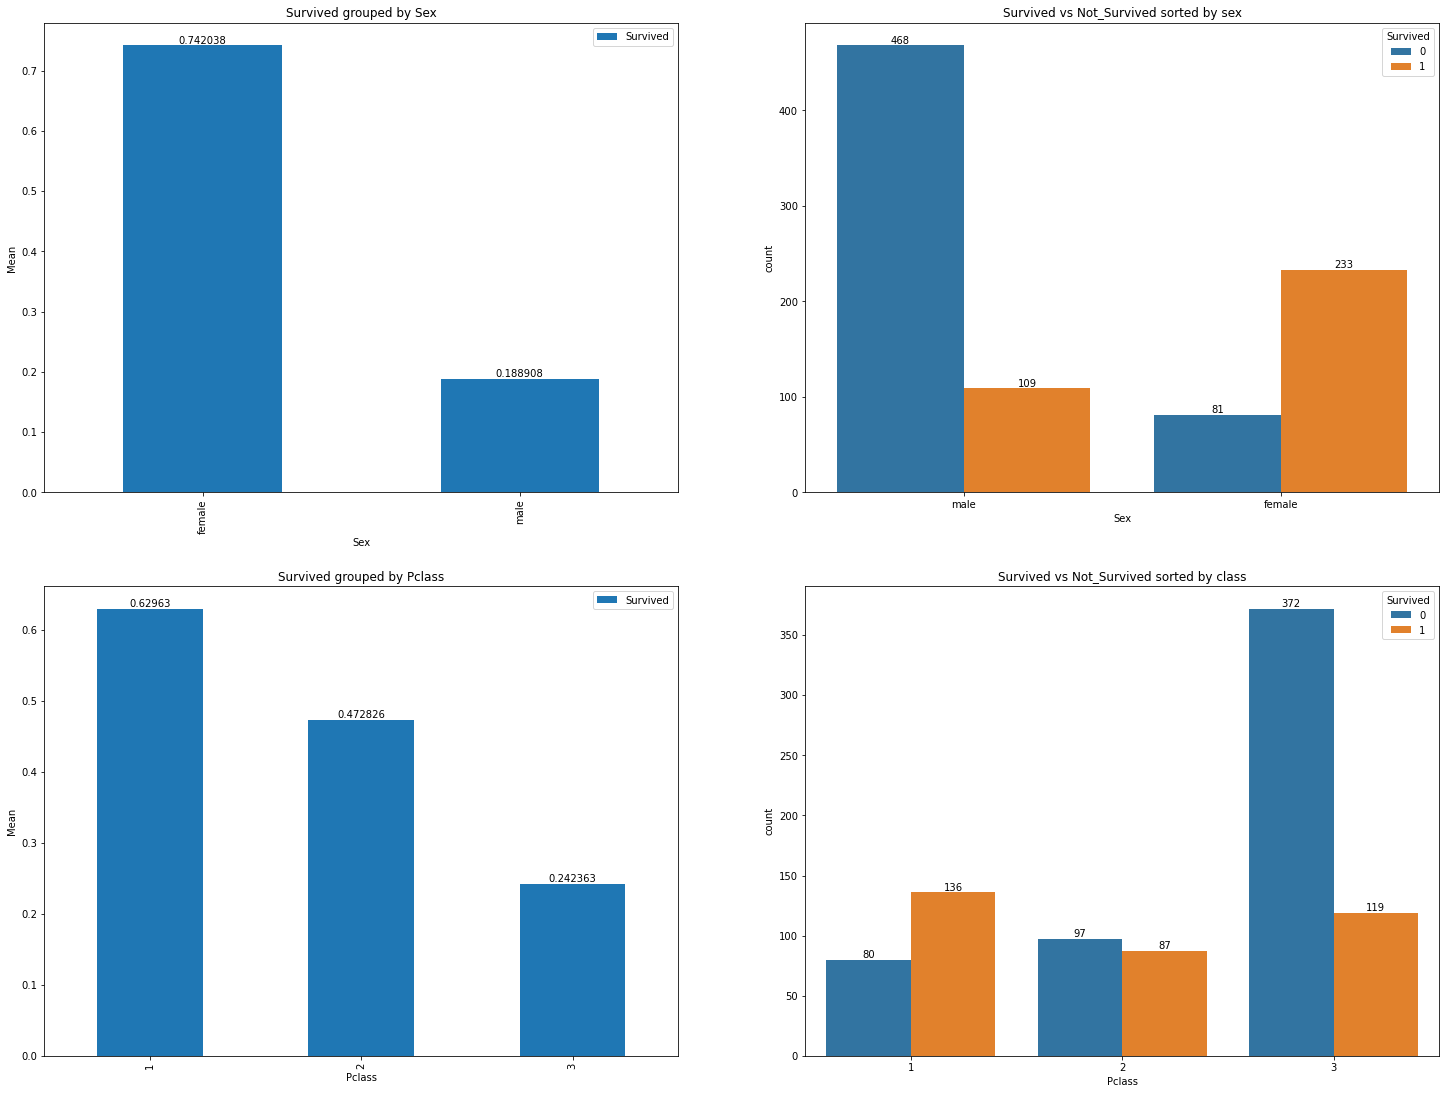

In [16]:
# visualization of 'Pclass' and 'Sex' features
fig, ax = plt.subplots(2, 2, figsize=(25, 19))

# Axes 0
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0][0])
ax[0][0].set_title('Survived grouped by Sex')
ax[0][0].set_ylabel('Mean')
ax[0][0].bar_label(ax[0][0].containers[0])
sns.countplot('Sex', hue='Survived', data=data, ax=ax[0][1])
ax[0][1].set_title('Survived vs Not_Survived sorted by sex')
ax[0][1].bar_label(ax[0][1].containers[0])
ax[0][1].bar_label(ax[0][1].containers[1])
# Axes 1
data[['Pclass', 'Survived']].groupby(['Pclass']).mean().plot.bar(ax=ax[1][0])
ax[1][0].set_title('Survived grouped by Pclass')
ax[1][0].set_ylabel('Mean')
ax[1][0].bar_label(ax[1][0].containers[0])
sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1][1])
ax[1][1].set_title('Survived vs Not_Survived sorted by class')
ax[1][1].bar_label(ax[1][1].containers[0])
ax[1][1].bar_label(ax[1][1].containers[1])
plt.show()

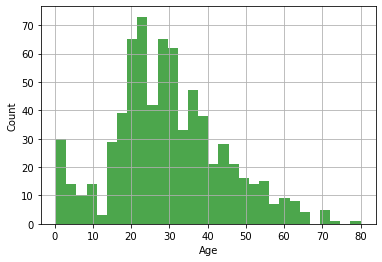

The average age of passengers is : 29
The maximum age of passengers is : 80
The minimum age of passengers is : 0


In [17]:
# a histogram showing the age distribution of passengers
data.Age.hist(bins=30, color='green', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
print("The average age of passengers is :", int(data.Age.mean()))
print("The maximum age of passengers is :", int(data.Age.max()))
print("The minimum age of passengers is :", int(data.Age.min()))

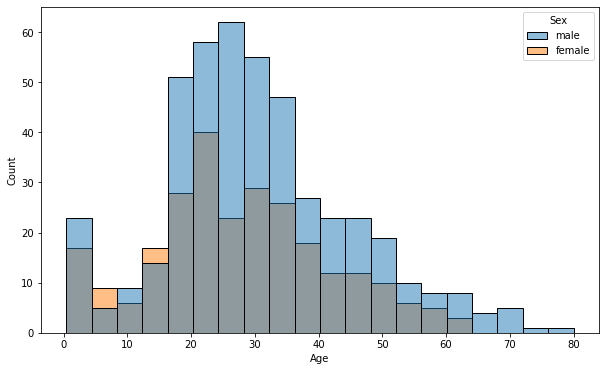

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', hue='Sex');

In [19]:
# the average age for survived and not survived passengers
age_surv = round(data.groupby(["Survived"])["Age"].mean(), 0)
age_surv.index = ["Not_survived", "Survived"]

print(f'The average age of not survived passengers is  {age_surv[0]} years.')
print(f'The average age of survived passengers is  {age_surv[1]} years.')

data.groupby('Survived', as_index=False)['Age'].mean()

The average age of not survived passengers is  31.0 years.
The average age of survived passengers is  28.0 years.


,Survived,Age
0,0,30.626179
1,1,28.343690


In [20]:
# average age according to the class
age_1 = data[data['Pclass'] == 1]['Age'].mean()
age_2 = data[data['Pclass'] == 2]['Age'].mean()
age_3 = data[data['Pclass'] == 3]['Age'].mean()

In [21]:
def fill_age(row):
    if pd.isnull(row['Age']):
        if row['Pclass'] == 1:
            return age_1
        if row['Pclass'] == 2:
            return age_2
        return age_3
    return row['Age']

In [22]:
data['Age'] = data.apply(fill_age, axis=1)

In [23]:
# alternative way according to the 'Pclass' and 'Sex'
mean_ages = data.groupby(['Sex', 'Pclass'])['Age'].mean()
display(mean_ages)

Sex     Pclass
female  1         34.958521
        2         28.753359
        3         22.738931
male    1         40.756740
        2         30.668784
        3         26.137286
Name: Age, dtype: float64

In [24]:
def replace_nan_age(row):
    if pd.isnull(row['Age']):
        return mean_ages[row['Sex'], row['Pclass']]
    else:
        return row['Age']


data['Age'] = data.apply(replace_nan_age, axis=1)

In [25]:
# create a table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class and male/female.
data.pivot_table(index='Pclass', columns='Sex',
                 values='Survived', aggfunc='count')

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


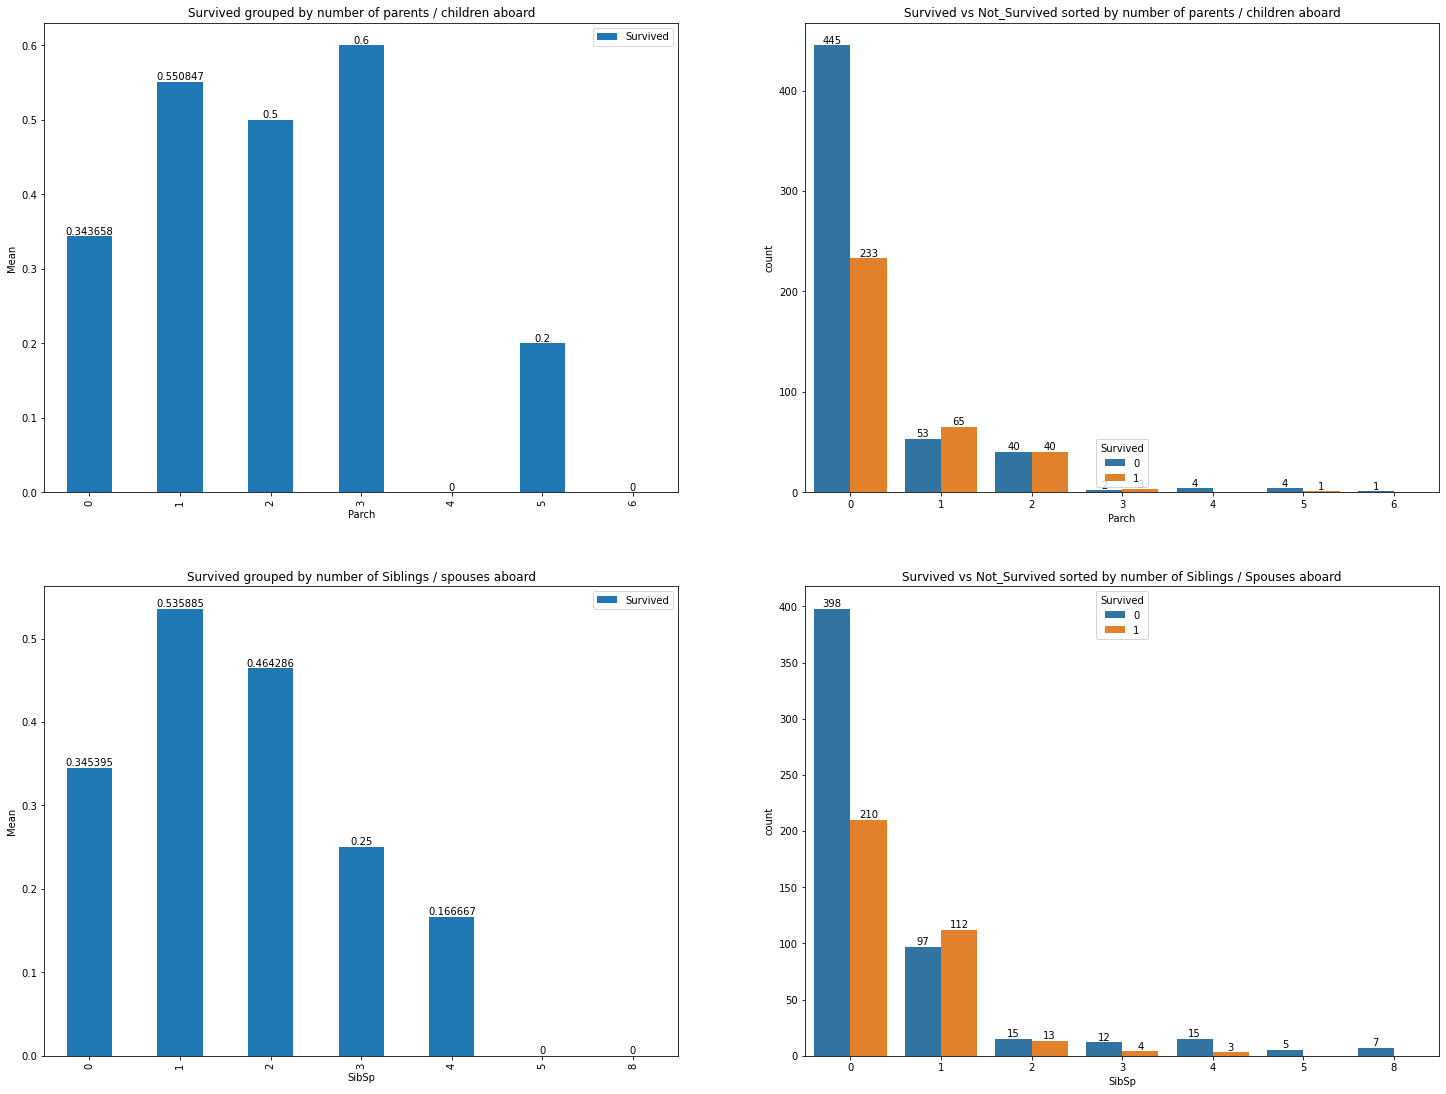

In [26]:
# visualization of 'Parch' and 'SibSp' features according to 'Survived'
fig, ax = plt.subplots(2, 2, figsize=(25, 19))

# Axes 0
data[['Parch', 'Survived']].groupby(['Parch']).mean().plot.bar(ax=ax[0][0])
ax[0][0].set_title('Survived grouped by number of parents / children aboard')
ax[0][0].set_ylabel('Mean')
ax[0][0].bar_label(ax[0][0].containers[0])
sns.countplot('Parch', hue='Survived', data=data, ax=ax[0][1])
ax[0][1].set_title(
    'Survived vs Not_Survived sorted by number of parents / children aboard')
ax[0][1].bar_label(ax[0][1].containers[0])
ax[0][1].bar_label(ax[0][1].containers[1])
# Axes 1
data[['SibSp', 'Survived']].groupby(['SibSp']).mean().plot.bar(ax=ax[1][0])
ax[1][0].set_title('Survived grouped by number of Siblings / spouses aboard')
ax[1][0].set_ylabel('Mean')
ax[1][0].bar_label(ax[1][0].containers[0])
sns.countplot('SibSp', hue='Survived', data=data, ax=ax[1][1])
ax[1][1].set_title(
    'Survived vs Not_Survived sorted by number of Siblings / Spouses aboard')
ax[1][1].bar_label(ax[1][1].containers[0])
ax[1][1].bar_label(ax[1][1].containers[1])
plt.show()

In [27]:
def is_alone(row):
    if row['SibSp'] + row['Parch'] == 0:
        return 0
    return 1


data['alone'] = data.apply(is_alone, axis=1)

,Survived,alone
0,0,0.318761
1,1,0.523392


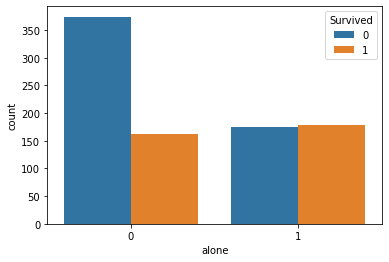

In [28]:
sns.countplot(x="alone", hue="Survived", data=data)
data.groupby('Survived', as_index=False)['alone'].mean()

In [29]:
# counting the family size
data['family_size'] = data['SibSp'] + data['Parch'] + 1

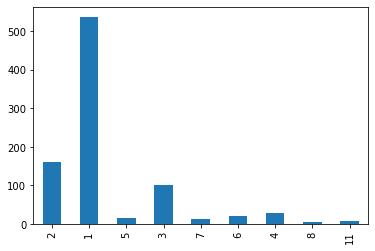

In [30]:
data['family_size'].value_counts(sort=False).plot.bar();

Percentage of people with a recorded Cabin number who survived: 66.66666666666666
Percentage of people without a recorded Cabin number who survived: 29.985443959243085


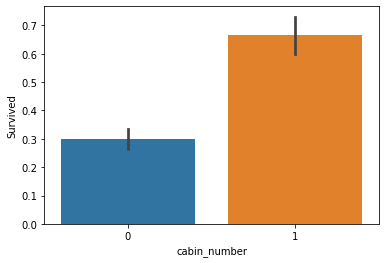

In [31]:
data["cabin_number"] = (data["Cabin"].notnull().astype('int'))

# calculate percentages of CabinBool vs. survived
print("Percentage of people with a recorded Cabin number who survived:",
      data["Survived"][data["cabin_number"] == 1].value_counts(normalize=True)[1]*100)

print("Percentage of people without a recorded Cabin number who survived:",
      data["Survived"][data["cabin_number"] == 0].value_counts(normalize=True)[1]*100)
# draw a bar plot of  people with a recorded Cabin number vs. survival
sns.barplot(x="cabin_number", y="Survived", data=data)
plt.show()

In [32]:
# info about the 'Embarked' feature
print("Number of people embarking in Southampton (S):")
southampton = data[data["Embarked"] == "S"].shape[0]
print(southampton)

print("Number of people embarking in Cherbourg (C):")
cherbourg = data[data["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Number of people embarking in Queenstown (Q):")
queenstown = data[data["Embarked"] == "Q"].shape[0]
print(queenstown)

Number of people embarking in Southampton (S):
644
Number of people embarking in Cherbourg (C):
168
Number of people embarking in Queenstown (Q):
77


In [33]:
# replace the missing values to the most frequent value
data = data.fillna({"Embarked": "S"})

In [34]:
# how the 'Name' looks like
data['Name']
data.iloc[0]['Name']

'Braund, Mr. Owen Harris'

In [35]:
# get the 'title' from 'Name'
data['title'] = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
data['title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [36]:
data['title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: title, dtype: int64

In [37]:
# what is 'Mlle'?
data[data['title'] == 'Mlle']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,alone,family_size,cabin_number,title
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.3000,B35,C,0,1,1,Mlle
710,711,1,1,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",female,24.0,0,0,PC 17482,49.5042,C90,C,0,1,1,Mlle


In [38]:
# grouping the 'title' into five groups
data['title'] = data['title'].replace(['Lady', 'Capt', 'Col', 'Don', 'Dr', 'Major',
                                       'Rev', 'Jonkheer', 'Dona', 'Countess', 'Sir'], 'Other')
data['title'] = data['title'].replace('Mlle', 'Miss')
data['title'] = data['title'].replace('Ms', 'Miss')
data['title'] = data['title'].replace('Mme', 'Mrs')

data[['title', 'Survived']].groupby(['title'], as_index=False).mean()

,title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826


In [39]:
data['title'].value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Other      23
Name: title, dtype: int64

In [40]:
# map each of the title groups to a numerical value
title_dict = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}
data['title'] = data['title'].replace(to_replace=title_dict)

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,alone,family_size,cabin_number,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,2,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,2,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,0,1


Mean value of Fare is : 32.2042079685746
Median value of Fare is : 14.4542


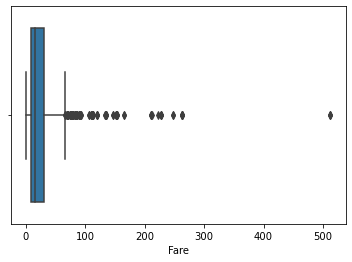

In [41]:
# plotting the 'Fare' column to see the data distribution
sns.boxplot("Fare", data=data)

# checking the mean and median values
print("Mean value of Fare is :", data.Fare.mean())
print("Median value of Fare is :", data.Fare.median())

In [42]:
# calculating the min, max and mean price of the ticket, excluding the free tickets
data[data['Fare'] > 0].groupby(by='Pclass')['Fare'].agg(['min', 'mean', 'max'])

,min,mean,max
Pclass,,,
1,5.0000,86.148874,512.3292
2,10.5000,21.358661,73.5000
3,4.0125,13.787875,69.5500


In [43]:
# calculating the min,max,mean ticket price according to the class for survived and not survived passengers
data.pivot_table(values='Fare', index='Pclass',
                 columns='Survived', aggfunc=['min', 'mean', 'max'])

min                mean                max          
Survived    0        1          0          1       0         1
Pclass                                                        
1         0.0  25.9292  64.684007  95.608029  263.00  512.3292
2         0.0  10.5000  19.412328  22.055700   73.50   65.0000
3         0.0   0.0000  13.669364  13.694887   69.55   56.4958

In [44]:
data['Fare'] = round(data['Fare'], 2)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,alone,family_size,cabin_number,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,1,2,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C,1,2,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S,0,1,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S,1,2,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S,0,1,0,1


In [45]:
data = data.drop(['Name', 'Ticket'], axis=1)

In [46]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,alone,family_size,cabin_number,title
0,1,0,3,male,22.0,1,0,7.25,NaN,S,1,2,0,1
1,2,1,1,female,38.0,1,0,71.28,C85,C,1,2,1,3
2,3,1,3,female,26.0,0,0,7.92,NaN,S,0,1,0,2
3,4,1,1,female,35.0,1,0,53.10,C123,S,1,2,1,3
4,5,0,3,male,35.0,0,0,8.05,NaN,S,0,1,0,1


In [47]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Cabin', 'Embarked', 'alone', 'family_size', 'cabin_number',
       'title'],
      dtype='object')

In [48]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,alone,family_size,cabin_number,title
0,1,0,3,male,22.0,1,0,7.25,NaN,S,1,2,0,1
1,2,1,1,female,38.0,1,0,71.28,C85,C,1,2,1,3
2,3,1,3,female,26.0,0,0,7.92,NaN,S,0,1,0,2
3,4,1,1,female,35.0,1,0,53.10,C123,S,1,2,1,3
4,5,0,3,male,35.0,0,0,8.05,NaN,S,0,1,0,1


In [49]:
df=data
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,alone,family_size,cabin_number,title
0,1,0,3,male,22.0,1,0,7.25,NaN,S,1,2,0,1
1,2,1,1,female,38.0,1,0,71.28,C85,C,1,2,1,3
2,3,1,3,female,26.0,0,0,7.92,NaN,S,0,1,0,2
3,4,1,1,female,35.0,1,0,53.10,C123,S,1,2,1,3
4,5,0,3,male,35.0,0,0,8.05,NaN,S,0,1,0,1


# Data check

<AxesSubplot:>

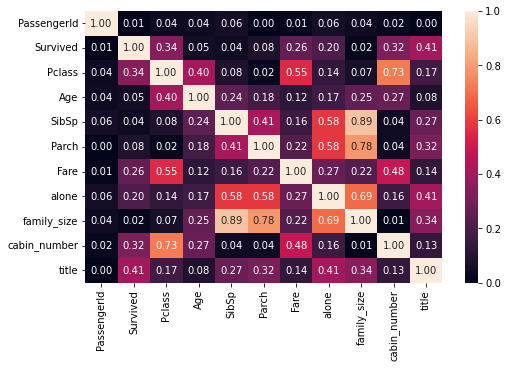

In [50]:
# correlation matrix
plt.figure(figsize=(8, 5))
sns.heatmap(data.corr().abs(), vmin=0, vmax=1, annot=True, fmt=".2f")

<AxesSubplot:xlabel='family_size', ylabel='Count'>

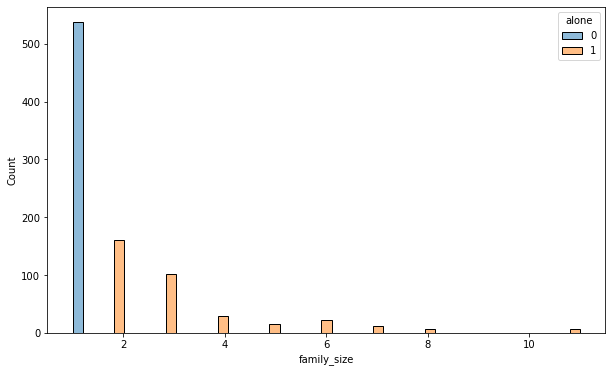

In [51]:
# even the correlation of 'alone' and 'family_size' is high, I'll leave both features to test first 
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='family_size', hue='alone')

# Baseline

1. Goal: to predict the survivals

In [52]:
# define X and y
X = data[['Pclass', 'Age', 'Fare', 'alone', 'cabin_number',
          'title', 'family_size', 'SibSp', 'Parch']]
y = data['Survived']

In [53]:
# split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25)

In [54]:
# create a baseline model
m_bl = DummyClassifier(strategy='most_frequent')
m_bl.fit(X_train, y_train)
y_pred = m_bl.predict(X_train)

In [55]:
m_bl.score(X_train, y_train)

0.5973053892215568

In [56]:
m_bl.score(X_val, y_val)

0.672645739910314

# Logistic Regression

In [57]:
# define X and y
X = data[['Pclass', 'Age', 'Fare', 'alone', 'cabin_number',
          'title', 'family_size', 'SibSp', 'Parch']]
y = data['Survived']

In [58]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [59]:
X_train.shape, y_train.shape

((712, 9), (712,))

In [60]:
X_test.shape, y_test.shape

((179, 9), (179,))

In [61]:
m_lr = LogisticRegression(class_weight="balanced")

In [62]:
m_lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [63]:
f' w1: {m_lr.coef_} and w0: {m_lr.intercept_}'

' w1: [[-0.45044377 -0.03347861  0.00562036  0.66875551  0.68527327  1.19721614\n  -0.3288839  -0.4776415   0.02081386]] and w0: [0.14764691]'

In [64]:
# calculate the accuracy
round(m_lr.score(X_test, y_test), 2), round(m_lr.score(X_train, y_train), 2)

(0.82, 0.79)

In [65]:
m_lr.predict(X_test)

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1])

In [66]:
m_lr.predict_proba(X_test)

array([[0.1135991 , 0.8864009 ],
       [0.70343968, 0.29656032],
       [0.72320411, 0.27679589],
       [0.16008533, 0.83991467],
       [0.42102518, 0.57897482],
       [0.20825555, 0.79174445],
       [0.4840682 , 0.5159318 ],
       [0.84737233, 0.15262767],
       [0.40859805, 0.59140195],
       [0.11792278, 0.88207722],
       [0.45691433, 0.54308567],
       [0.85360587, 0.14639413],
       [0.86938696, 0.13061304],
       [0.78568877, 0.21431123],
       [0.73440219, 0.26559781],
       [0.07624504, 0.92375496],
       [0.49942827, 0.50057173],
       [0.48395591, 0.51604409],
       [0.01673957, 0.98326043],
       [0.50760627, 0.49239373],
       [0.74921649, 0.25078351],
       [0.60432449, 0.39567551],
       [0.46701788, 0.53298212],
       [0.72173912, 0.27826088],
       [0.74942162, 0.25057838],
       [0.329299  , 0.670701  ],
       [0.01520137, 0.98479863],
       [0.70050014, 0.29949986],
       [0.28654394, 0.71345606],
       [0.5329156 , 0.4670844 ],
       [0.

In [67]:
ypred = m_lr.predict(X_test)
print('accuracy: ', accuracy_score(y_test, ypred))
print('precision: ', precision_score(y_test, ypred))
print('recall: ', recall_score(y_test, ypred))
print('f1_score: ', f1_score(y_test, ypred))

accuracy:  0.8212290502793296
precision:  0.75
recall:  0.8513513513513513
f1_score:  0.7974683544303798


In [68]:
probs = m_lr.predict_proba(X_test)
probs = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = roc_auc_score(y_test, probs)

In [69]:
auc_score = auc(fpr, tpr)
print("Area under the curve = ", auc_score)

Area under the curve =  0.8648648648648648


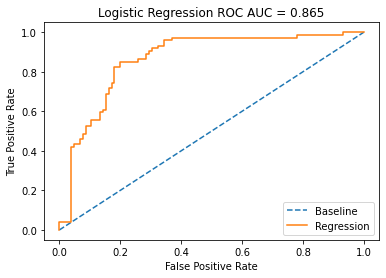

In [70]:
# visualization ROC AUC
plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label='Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Feature engineering

In [71]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,alone,family_size,cabin_number,title
0,1,0,3,male,22.0,1,0,7.25,NaN,S,1,2,0,1
1,2,1,1,female,38.0,1,0,71.28,C85,C,1,2,1,3
2,3,1,3,female,26.0,0,0,7.92,NaN,S,0,1,0,2
3,4,1,1,female,35.0,1,0,53.10,C123,S,1,2,1,3
4,5,0,3,male,35.0,0,0,8.05,NaN,S,0,1,0,1


In [72]:
columns_to_change = ['Sex', 'Embarked']

for column in columns_to_change:
    data[column] = data[column].astype('category').cat.codes

In [73]:
pd.cut(data['Age'], bins=3)

0        (0.34, 26.947]
1      (26.947, 53.473]
2        (0.34, 26.947]
3      (26.947, 53.473]
4      (26.947, 53.473]
             ...       
886    (26.947, 53.473]
887      (0.34, 26.947]
888      (0.34, 26.947]
889      (0.34, 26.947]
890    (26.947, 53.473]
Name: Age, Length: 891, dtype: category
Categories (3, interval[float64, right]): [(0.34, 26.947] < (26.947, 53.473] < (53.473, 80.0]]

<AxesSubplot:>

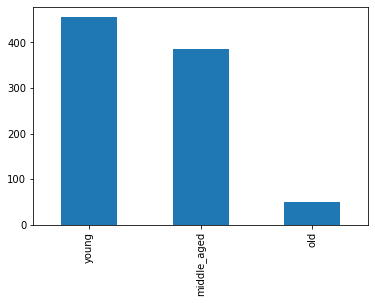

In [74]:
# bin the imputed 'Age' column into 3 bins (young, middle-aged, old)
pd.cut(data['Age'], bins=3, labels=['young', 'middle_aged', 'old']
       ).value_counts(sort=False).plot.bar()

In [75]:
data['age_binned'] = pd.cut(data['Age'], bins=3, labels=[
                            'young', 'middle_aged', 'old'])

In [76]:
data['age_binned'].value_counts()

young          455
middle_aged    386
old             50
Name: age_binned, dtype: int64

In [77]:
data['age_binned'] = data['age_binned'].astype('category').cat.codes

In [78]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,alone,family_size,cabin_number,title,age_binned
0,1,0,3,1,22.0,1,0,7.25,NaN,2,1,2,0,1,0
1,2,1,1,0,38.0,1,0,71.28,C85,0,1,2,1,3,1
2,3,1,3,0,26.0,0,0,7.92,NaN,2,0,1,0,2,0
3,4,1,1,0,35.0,1,0,53.10,C123,2,1,2,1,3,1
4,5,0,3,1,35.0,0,0,8.05,NaN,2,0,1,0,1,1


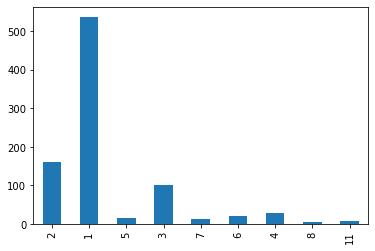

In [79]:
data['family_size'].value_counts(sort=False).plot.bar();

In [80]:
data['big_family'] = data['family_size'].apply(lambda x: 0 if x <= 3 else 1)

In [81]:
data['Cabin'].fillna('Unknown')

0      Unknown
1          C85
2      Unknown
3         C123
4      Unknown
        ...   
886    Unknown
887        B42
888    Unknown
889       C148
890    Unknown
Name: Cabin, Length: 891, dtype: object

In [82]:
# use the cabin information 
data['cabin_label'] = data.Cabin.apply(lambda x: str(x)[0])
data['cabin_label'].value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_label, dtype: int64

In [83]:
data = pd.get_dummies(data, columns=['cabin_label'])

In [84]:
#data['cabin_label'] = data['cabin_label'].astype('category').cat.codes

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 720x432 with 0 Axes>

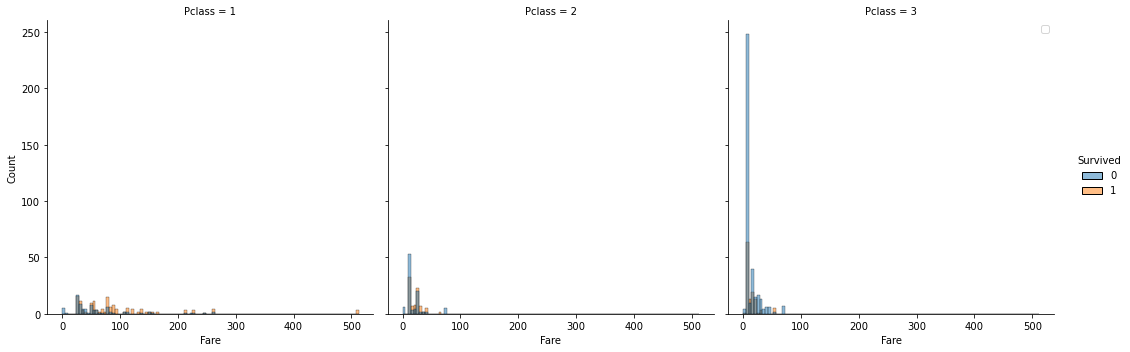

In [85]:
plt.figure(figsize=(10, 6))
sns.displot(data=data, x="Fare", hue='Survived', col='Pclass')
plt.legend()

In [86]:
# cut the 'Fare' column into 4 equal-sized bins
data["fare_range"] = pd.qcut(data['Fare'], 4, labels=[
                             'mega_cheap', 'cheap', 'middle', 'expensive'])

In [87]:
# survival rate for all fare range
data[['fare_range', 'Survived']].groupby(['fare_range'], as_index=False)[
    'Survived'].mean().sort_values(by='fare_range', ascending=False)

,fare_range,Survived
3,expensive,0.581081
2,middle,0.454955
1,cheap,0.303571
0,mega_cheap,0.197309


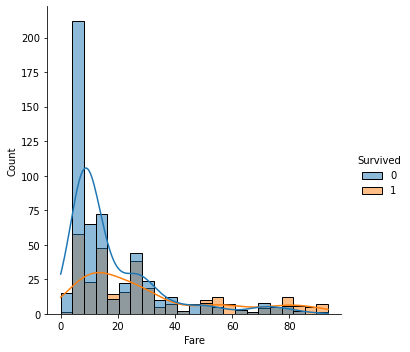

In [88]:
# check the 'fare_range' (0-100)
sns.displot(data=data[data['Fare'] < 100], x="Fare",
            kind="hist", kde=True, hue='Survived')

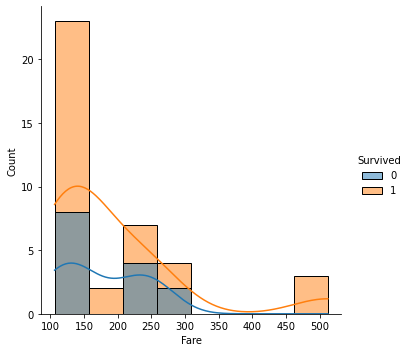

In [89]:
sns.displot(data=data[data['Fare'] > 100], x="Fare",
            kind="hist", kde=True, hue='Survived')

In [90]:
data['fare_range'] = data['fare_range'].astype('category').cat.codes

Scalling

In [91]:
scaler = MinMaxScaler()

In [92]:
col = data[['Fare']]
col

,Fare
0,7.25
1,71.28
2,7.92
3,53.10
4,8.05
...,...
886,13.00
887,30.00
888,23.45
889,30.00


In [93]:
scaler.fit(col)
t = scaler.transform(col)

In [94]:
col_scaled = pd.DataFrame(t, columns=col.columns)
col_scaled.head(5)

,Fare
0,0.014151
1,0.139129
2,0.015459
3,0.103644
4,0.015713


In [95]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,...,cabin_label_A,cabin_label_B,cabin_label_C,cabin_label_D,cabin_label_E,cabin_label_F,cabin_label_G,cabin_label_T,cabin_label_n,fare_range
0,1,0,3,1,22.0,1,0,7.25,NaN,2,...,0,0,0,0,0,0,0,0,1,0
1,2,1,1,0,38.0,1,0,71.28,C85,0,...,0,0,1,0,0,0,0,0,0,3
2,3,1,3,0,26.0,0,0,7.92,NaN,2,...,0,0,0,0,0,0,0,0,1,1
3,4,1,1,0,35.0,1,0,53.10,C123,2,...,0,0,1,0,0,0,0,0,0,3
4,5,0,3,1,35.0,0,0,8.05,NaN,2,...,0,0,0,0,0,0,0,0,1,1


In [96]:
data = data.drop(['Cabin'], axis=1)

In [97]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,alone,...,cabin_label_A,cabin_label_B,cabin_label_C,cabin_label_D,cabin_label_E,cabin_label_F,cabin_label_G,cabin_label_T,cabin_label_n,fare_range
0,1,0,3,1,22.0,1,0,7.25,2,1,...,0,0,0,0,0,0,0,0,1,0
1,2,1,1,0,38.0,1,0,71.28,0,1,...,0,0,1,0,0,0,0,0,0,3
2,3,1,3,0,26.0,0,0,7.92,2,0,...,0,0,0,0,0,0,0,0,1,1
3,4,1,1,0,35.0,1,0,53.10,2,1,...,0,0,1,0,0,0,0,0,0,3
4,5,0,3,1,35.0,0,0,8.05,2,0,...,0,0,0,0,0,0,0,0,1,1


# Logistic Regression vol.2

In [98]:
X = data[['Pclass', 'Age', 'Fare', 'alone', 'cabin_number', 'title', 'Sex', 'Embarked',
          'family_size', 'age_binned', 'big_family']]
y = data['Survived']

In [99]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25)

In [100]:
print(X.shape, y.shape)

(891, 11) (891,)


In [101]:
m_lr1 = LogisticRegression(max_iter=10000)

In [102]:
m_lr1.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [103]:
# calculating the accuracy score
m_lr1.score(X_train, y_train)

0.8203592814371258

In [104]:
ypred = m_lr1.predict(X_val)  # generating predictive results
accuracy_score(y_val, ypred)  # compare predictive results to actual result

0.820627802690583

In [105]:
# comparing metrics
metrics = ['accuracy', 'precision', 'recall', 'f1_score', 'ROC_AUC']
summary = pd.DataFrame(index=metrics)


def summary_metrics(summary, col, y_val, ypred, y_probs):
    values = [accuracy_score(y_val, ypred), precision_score(y_val, ypred), recall_score(y, ypred),
              f1_score(y_val, ypred), roc_auc_score(y_val, y_probs)]
    summary[col] = values
    return summary

In [106]:
ypred = m_lr1.predict(X_val)
print('accuracy: ', accuracy_score(y_val, ypred))
print('precision: ', precision_score(y_val, ypred))
print('recall: ', recall_score(y_val, ypred))
print('f1_score: ', f1_score(y_val, ypred))

accuracy:  0.820627802690583
precision:  0.7752808988764045
recall:  0.7752808988764045
f1_score:  0.7752808988764045


In [107]:
conf = confusion_matrix(y_val, ypred)
conf

array([[114,  20],
       [ 20,  69]])

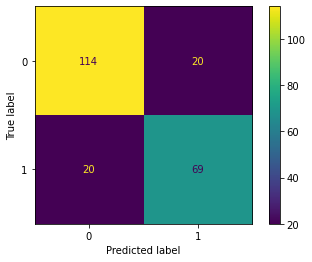

In [108]:
plot_confusion_matrix(m_lr1, X_val, y_val, normalize=None)

In [109]:
m_lr1.predict(X_val)

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0])

In [110]:
m_lr1.predict_proba(X_val)

array([[0.35011175, 0.64988825],
       [0.89863826, 0.10136174],
       [0.75028406, 0.24971594],
       [0.32140423, 0.67859577],
       [0.77166812, 0.22833188],
       [0.89877898, 0.10122102],
       [0.93336168, 0.06663832],
       [0.91216702, 0.08783298],
       [0.30224402, 0.69775598],
       [0.81968095, 0.18031905],
       [0.88383353, 0.11616647],
       [0.91259292, 0.08740708],
       [0.38702751, 0.61297249],
       [0.32045012, 0.67954988],
       [0.57264479, 0.42735521],
       [0.2413625 , 0.7586375 ],
       [0.39821274, 0.60178726],
       [0.91830595, 0.08169405],
       [0.03229402, 0.96770598],
       [0.84006102, 0.15993898],
       [0.07248805, 0.92751195],
       [0.90589343, 0.09410657],
       [0.24155612, 0.75844388],
       [0.88404078, 0.11595922],
       [0.95313111, 0.04686889],
       [0.91829985, 0.08170015],
       [0.91259292, 0.08740708],
       [0.9034667 , 0.0965333 ],
       [0.70276744, 0.29723256],
       [0.89051097, 0.10948903],
       [0.

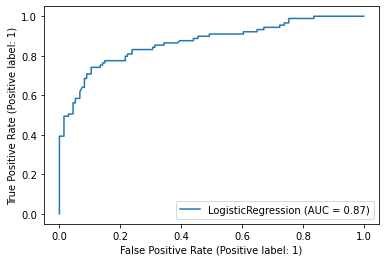

In [111]:
plot_roc_curve(m_lr1, X_val, y_val)

In [112]:
fpr, tpr, threshold = roc_curve(y_val, m_lr1.predict_proba(X_val)[:, 1])

In [113]:
auc_score = auc(fpr, tpr)
print("Area under the curve = ", auc_score)

Area under the curve =  0.8686483313768237


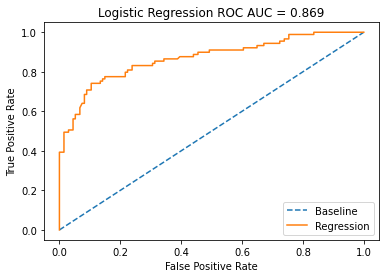

In [114]:
probs = m_lr1.predict_proba(X_val)
probs = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_val, probs)
roc_auc = roc_auc_score(y_val, probs)

# visualisation ROC AUC
plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label='Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Decision Tree Classifier

In [115]:
X = data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'alone', 'cabin_number', 'title', 'Sex', 'Embarked',
          'family_size', 'age_binned', 'big_family']]
y = data['Survived']

In [116]:
m_dt = DecisionTreeClassifier(max_depth=5, criterion='gini')
m_dt.fit(X, y)

DecisionTreeClassifier(max_depth=5)

In [117]:
ypred = m_dt.predict(X)

In [118]:
accuracy_score(y, ypred)

0.8484848484848485

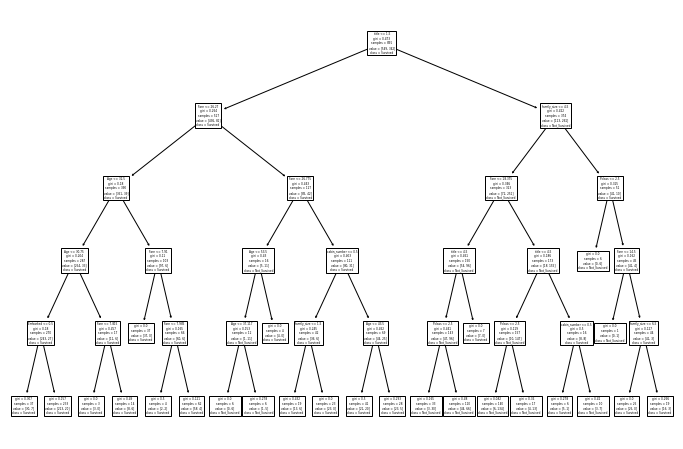

In [119]:
plt.figure(figsize=(12, 8))
t = plot_tree(m_dt, feature_names=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'alone', 'cabin_number', 'title', 'Sex', 'Embarked',
                                   'family_size', 'age_binned', 'big_family'], class_names=['Survived', 'Not_Survived'])

# RandomForest

In [120]:
X = data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'alone', 'cabin_number', 'title', 'Sex', 'Embarked',
          'family_size', 'age_binned', 'big_family']]
y = data['Survived']

In [121]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25)

In [122]:
m_rf = RandomForestClassifier(max_depth=5, random_state=42, n_estimators=15)

In [123]:
m_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=15, random_state=42)

In [124]:
ypred = m_rf.predict(X_val)

In [125]:
accuracy_score(ypred, y_val)

0.8430493273542601

In [126]:
ypred = m_rf.predict(X_val)
print('accuracy: ', accuracy_score(y_val, ypred))
print('precision: ', precision_score(y_val, ypred))
print('recall: ', recall_score(y_val, ypred))
print('f1_score: ', f1_score(y_val, ypred))

accuracy:  0.8430493273542601
precision:  0.8028169014084507
recall:  0.7307692307692307
f1_score:  0.7651006711409397


In [127]:
probs = m_rf.predict_proba(X_val)
probs = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_val, probs)
roc_auc = roc_auc_score(y_val, probs)

In [128]:
auc_score = auc(fpr, tpr)
print("Area under the curve = ", auc_score)

Area under the curve =  0.8936781609195403


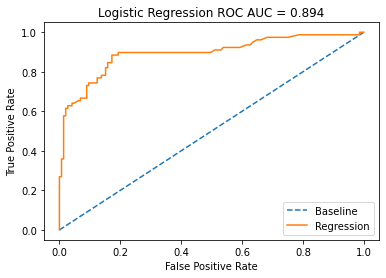

In [129]:
# visualization ROC AUC
plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label='Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [130]:
conf = confusion_matrix(y_val, ypred)
conf

array([[131,  14],
       [ 21,  57]])

Crossvalidation

In [131]:
acc = cross_val_score(m_rf, X_train, y_train,
                      cv=10, verbose=3, scoring='accuracy')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] END ................................ score: (test=0.836) total time=   0.0s
[CV] END ................................ score: (test=0.776) total time=   0.1s
[CV] END ................................ score: (test=0.821) total time=   0.0s
[CV] END ................................ score: (test=0.776) total time=   0.0s
[CV] END ................................ score: (test=0.791) total time=   0.0s
[CV] END ................................ score: (test=0.881) total time=   0.1s
[CV] END ................................ score: (test=0.731) total time=   0.1s
[CV] END ................................ score: (test=0.851) total time=   0.1s
[CV] END ................................ score: (test=0.848) total time=   0.3s
[CV] END ................................ score: (test=0.848) total time=   0.3s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.1s finished


In [132]:
results = cross_val_score(m_rf, X_train, y_train, cv=10)
results.mean()

0.8159656264133875

In [133]:
results.std()

0.04344867935674748

In [134]:
m_rf.score(X_val, y_val)

0.8430493273542601

StratifiedShuffleSplit 

In [135]:
shuffle_s = StratifiedShuffleSplit(n_splits=10, test_size=.20,
                                   random_state=1)

In [136]:
cross_validation_m_rf = cross_val_score(estimator=m_rf,
                                        X=X_train,
                                        y=y_train,
                                        scoring='accuracy',
                                        cv=shuffle_s,
                                        verbose=3)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] END ................................ score: (test=0.836) total time=   0.1s
[CV] END ................................ score: (test=0.799) total time=   0.0s
[CV] END ................................ score: (test=0.813) total time=   0.0s
[CV] END ................................ score: (test=0.813) total time=   0.0s
[CV] END ................................ score: (test=0.836) total time=   0.0s
[CV] END ................................ score: (test=0.828) total time=   0.0s
[CV] END ................................ score: (test=0.799) total time=   0.1s
[CV] END ................................ score: (test=0.784) total time=   0.1s
[CV] END ................................ score: (test=0.836) total time=   0.1s
[CV] END ................................ score: (test=0.851) total time=   0.1s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.6s finished


In [137]:
print(f'Validation accuracy scores: {np.round(cross_validation_m_rf,2)}')
print(f'\nmean: {cross_validation_m_rf.mean():.2}')
print(f'std: {cross_validation_m_rf.std():.1}')

Validation accuracy scores: [0.84 0.8  0.81 0.81 0.84 0.83 0.8  0.78 0.84 0.85]

mean: 0.82
std: 0.02


# Hyperparameters

In [138]:
X = data[['Pclass','Age','SibSp','Parch','Fare','alone', 'cabin_number', 'title', 'Sex','Embarked',
          'family_size', 'age_binned','big_family']]
y = data['Survived']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y)

In [139]:
# types of regularization
penalty = ['l1', 'l2']

# set restrictions for the regularization parameter
C = np.logspace(0, 4, 10)

# create hyperparameters
hyperparameters = dict(C=C, penalty=penalty)

m_rf = LogisticRegression()
m_rf.fit(X_train, y_train)

# create a search grid using 5-fold cross-validation
clf = GridSearchCV(m_rf, hyperparameters, cv=5, verbose=0)

best_model = clf.fit(X_train, y_train)

# check of the best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 7.742636826811269


In [140]:
# train model with hyperparameters
m_rf = LogisticRegression(
    penalty='l2', C=7.742636826811269, max_iter=1000)
m_rf.fit(X_train, y_train)

LogisticRegression(C=7.742636826811269, max_iter=1000)

In [141]:
probs = m_rf.predict_proba(X_val)
y_probs = probs[:, 1]
ypred = m_rf.predict(X_val)

In [142]:
print('accuracy: ', accuracy_score(y_val, ypred))
print('precision: ', precision_score(y_val, ypred))
print('recall: ', recall_score(y_val, ypred))
print('f1_score: ', f1_score(y_val, ypred))

accuracy:  0.8059701492537313
precision:  0.7383177570093458
recall:  0.7669902912621359
f1_score:  0.7523809523809523


# RandomForest vol.2

In [143]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked', 'alone', 'family_size', 'cabin_number', 'title',
       'age_binned', 'big_family', 'cabin_label_A', 'cabin_label_B',
       'cabin_label_C', 'cabin_label_D', 'cabin_label_E', 'cabin_label_F',
       'cabin_label_G', 'cabin_label_T', 'cabin_label_n', 'fare_range'],
      dtype='object')

In [144]:
X = data[['Pclass', 'Sex', 'Embarked', 'fare_range', 'title', 'age_binned', 'big_family',
          'cabin_label_A', 'cabin_label_B', 'cabin_label_C', 'cabin_label_D', 'cabin_label_E',
          'cabin_label_F', 'cabin_label_G', 'cabin_label_T', 'cabin_label_n', 'fare_range']]
y = data['Survived']

In [145]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25)

In [146]:
m_rf2 = RandomForestClassifier(n_estimators=15, random_state=42, max_depth=5)

m_rf2.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=15, random_state=42)

In [147]:
m_rf2.score(X_train, y_train)

0.8562874251497006

In [148]:
ypred_rf = m_rf2.predict(X_val)

In [149]:
accuracy_score(ypred_rf, y_val)

0.7713004484304933

In [150]:
ypred = m_rf2.predict(X_val)
print('accuracy: ', accuracy_score(y_val, ypred_rf))
print('precision: ', precision_score(y_val, ypred_rf))
print('recall: ', recall_score(y_val, ypred_rf))
print('f1_score: ', f1_score(y_val, ypred_rf))

accuracy:  0.7713004484304933
precision:  0.7560975609756098
recall:  0.6666666666666666
f1_score:  0.7085714285714285


In [151]:
probs = m_rf2.predict_proba(X_val)
probs = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_val, probs)
roc_auc = roc_auc_score(y_val, probs)

In [152]:
auc_score = auc(fpr, tpr)
print("Area under the curve = ", auc_score)

Area under the curve =  0.8370140612076098


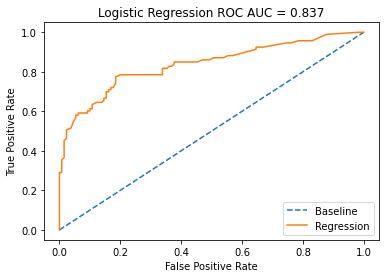

In [153]:
# visualization ROC AUC
plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label='Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [154]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Cabin', 'Embarked', 'alone', 'family_size', 'cabin_number',
       'title', 'age_binned', 'big_family', 'cabin_label'],
      dtype='object')

# Polynomial Features

In [155]:
from sklearn import preprocessing

X = data[['Pclass', 'Sex', 'Embarked', 'fare_range', 'title', 'age_binned', 'big_family',
          'cabin_label_A', 'cabin_label_B', 'cabin_label_C', 'cabin_label_D', 'cabin_label_E',
          'cabin_label_F', 'cabin_label_G', 'cabin_label_T', 'cabin_label_n', 'fare_range']]
y = data['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25)

poly = preprocessing.PolynomialFeatures(degree=2,include_bias=False)
poly_features = poly.fit_transform(X)

m_rf5 = RandomForestClassifier(n_estimators=15, random_state=42, max_depth=5)
m_rf5.fit(X_train, y_train)
ypred_5=m_rf5.predict(X_val)

print('accuracy: ', accuracy_score(y_val, ypred_rf))
print('precision: ', precision_score(y_val, ypred_rf))
print('recall: ', recall_score(y_val, ypred_rf))
print('f1_score: ', f1_score(y_val, ypred_rf))

accuracy:  0.515695067264574
precision:  0.4024390243902439
recall:  0.358695652173913
f1_score:  0.3793103448275862


# SVC

In [156]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked', 'alone', 'family_size', 'cabin_number', 'title',
       'age_binned', 'big_family', 'cabin_label_A', 'cabin_label_B',
       'cabin_label_C', 'cabin_label_D', 'cabin_label_E', 'cabin_label_F',
       'cabin_label_G', 'cabin_label_T', 'cabin_label_n', 'fare_range'],
      dtype='object')

In [157]:
from sklearn.svm import SVC
from matplotlib import pyplot as plt

X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked', 'alone', 'family_size', 'title',
       'age_binned', 'big_family', 'cabin_label_A', 'cabin_label_B',
       'cabin_label_C', 'cabin_label_D', 'cabin_label_E', 'cabin_label_F',
       'cabin_label_G', 'cabin_label_T', 'cabin_label_n', 'fare_range']]
y = data['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25)

# train a classifier
m_svc = SVC(kernel='rbf', C=0.1)
m_svc.fit(X_train, y_train)
print(m_svc.score(X_train, y_train))

0.6736526946107785


# Feature engineering vol.2

In [158]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,alone,family_size,cabin_number,title,age_binned,big_family,cabin_label
0,1,0,3,1,22.0,1,0,7.25,NaN,2,1,2,0,1,0,0,n
1,2,1,1,0,38.0,1,0,71.28,C85,0,1,2,1,3,1,0,C
2,3,1,3,0,26.0,0,0,7.92,NaN,2,0,1,0,2,0,0,n
3,4,1,1,0,35.0,1,0,53.10,C123,2,1,2,1,3,1,0,C
4,5,0,3,1,35.0,0,0,8.05,NaN,2,0,1,0,1,1,0,n


In [159]:
pd.cut(df['Age'], bins = 5).value_counts()

(16.336, 32.252]    493
(32.252, 48.168]    218
(0.34, 16.336]      100
(48.168, 64.084]     69
(64.084, 80.0]       11
Name: Age, dtype: int64

In [160]:
# cut the 'Age' column into 5 equal-sized bins
df["age_cut"] = pd.qcut(df['Age'],5,labels = ['kids', 'young', 'middle_aged', 'old','super_old'])

In [161]:
df["age_cut"].value_counts()

young          258
kids           179
super_old      177
old            158
middle_aged    119
Name: age_cut, dtype: int64

In [162]:
df['big_family'] = df['family_size'].apply(lambda x: 0 if x<=3 else 1)

In [163]:
df["fare_range"] = pd.qcut(df['Fare'],5,labels = ['mega_cheap', 'cheap','economy', 'middle_priced','expensive'])

In [164]:
# instantiate our One-Hot Encoder object
ohe = OneHotEncoder(drop = 'first')

In [165]:
encoded = ohe.fit_transform(df[['age_cut', 'cabin_label', 'fare_range']]).toarray()
encoded

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [166]:
labels = ohe.get_feature_names_out()
labels

array(['age_cut_middle_aged', 'age_cut_old', 'age_cut_super_old',
       'age_cut_young', 'cabin_label_B', 'cabin_label_C', 'cabin_label_D',
       'cabin_label_E', 'cabin_label_F', 'cabin_label_G', 'cabin_label_T',
       'cabin_label_n', 'fare_range_economy', 'fare_range_expensive',
       'fare_range_mega_cheap', 'fare_range_middle_priced'], dtype=object)

In [167]:
enc_df = pd.DataFrame(data = encoded, 
                      columns = labels, 
                      index = df.index)

In [168]:
df = pd.concat([df, enc_df], axis = 1).drop(['age_cut', 'cabin_label', 'fare_range'], axis = 1)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,...,cabin_label_D,cabin_label_E,cabin_label_F,cabin_label_G,cabin_label_T,cabin_label_n,fare_range_economy,fare_range_expensive,fare_range_mega_cheap,fare_range_middle_priced
0,1,0,3,1,22.00000,1,0,7.25,NaN,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,2,1,1,0,38.00000,1,0,71.28,C85,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,1,3,0,26.00000,0,0,7.92,NaN,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,1,1,0,35.00000,1,0,53.10,C123,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,0,3,1,35.00000,0,0,8.05,NaN,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.00000,0,0,13.00,NaN,2,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
887,888,1,1,0,19.00000,0,0,30.00,B42,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
888,889,0,3,0,25.14062,1,2,23.45,NaN,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
889,890,1,1,1,26.00000,0,0,30.00,C148,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [169]:
scaler = StandardScaler()

In [170]:
col = df[['Fare']]

In [171]:
scaler.fit(col)
t = scaler.transform(col)

In [172]:
fare_scaled = pd.DataFrame(t, columns = col.columns)
fare_scaled.head(5)

,Fare
0,-0.502449
1,0.786776
2,-0.488958
3,0.420727
4,-0.486341


In [173]:
#df = pd.concat(([df, fare_scaled], axis = 1).drop(['Fare'], axis = 1))
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,...,cabin_label_D,cabin_label_E,cabin_label_F,cabin_label_G,cabin_label_T,cabin_label_n,fare_range_economy,fare_range_expensive,fare_range_mega_cheap,fare_range_middle_priced
0,1,0,3,1,22.00000,1,0,7.25,NaN,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,2,1,1,0,38.00000,1,0,71.28,C85,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,1,3,0,26.00000,0,0,7.92,NaN,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,1,1,0,35.00000,1,0,53.10,C123,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,0,3,1,35.00000,0,0,8.05,NaN,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.00000,0,0,13.00,NaN,2,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
887,888,1,1,0,19.00000,0,0,30.00,B42,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
888,889,0,3,0,25.14062,1,2,23.45,NaN,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
889,890,1,1,1,26.00000,0,0,30.00,C148,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [174]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Cabin', 'Embarked', 'alone', 'family_size', 'cabin_number',
       'title', 'age_binned', 'big_family', 'age_cut_middle_aged',
       'age_cut_old', 'age_cut_super_old', 'age_cut_young', 'cabin_label_B',
       'cabin_label_C', 'cabin_label_D', 'cabin_label_E', 'cabin_label_F',
       'cabin_label_G', 'cabin_label_T', 'cabin_label_n', 'fare_range_economy',
       'fare_range_expensive', 'fare_range_mega_cheap',
       'fare_range_middle_priced'],
      dtype='object')

In [175]:
df = df.drop(['Cabin', 'alone', 'cabin_number','Age'],axis=1)

In [176]:
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,family_size,title,...,cabin_label_D,cabin_label_E,cabin_label_F,cabin_label_G,cabin_label_T,cabin_label_n,fare_range_economy,fare_range_expensive,fare_range_mega_cheap,fare_range_middle_priced
0,1,0,3,1,1,0,7.25,2,2,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,2,1,1,0,1,0,71.28,0,2,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,1,3,0,0,0,7.92,2,1,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,1,1,0,1,0,53.10,2,2,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,0,3,1,0,0,8.05,2,1,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# Logistic Regression vol.3

In [177]:
X = df[['Pclass', 'Sex', 'family_size', 'title', 
       'age_cut_middle_aged', 'age_cut_old', 'age_cut_super_old',
        'age_cut_young', 'cabin_label_B', 'cabin_label_C', 'cabin_label_D',
        'cabin_label_E', 'cabin_label_F', 'cabin_label_G', 'cabin_label_T',
        'cabin_label_n', 'Fare']]
y = df['Survived']

In [178]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25)

In [179]:
print(X.shape, y.shape)

(891, 17) (891,)


In [180]:
m_lr3 = LogisticRegression(C=7.7)

In [181]:
m_lr3.fit(X_train, y_train)

LogisticRegression(C=7.7)

In [182]:
#calculating the accuracy score
m_lr3.score(X_train, y_train) 

0.8233532934131736

In [183]:
ypred = m_lr3.predict(X_val)
print('accuracy: ', accuracy_score(y_val, ypred))
print('precision: ', precision_score(y_val, ypred))
print('recall: ', recall_score(y_val, ypred))
print('f1_score: ', f1_score(y_val, ypred))

accuracy:  0.8116591928251121
precision:  0.7530864197530864
recall:  0.7349397590361446
f1_score:  0.7439024390243902


In [184]:
conf = confusion_matrix(y_val, ypred)
conf

array([[120,  20],
       [ 22,  61]])

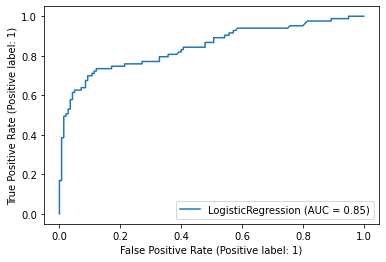

In [185]:
plot_roc_curve(m_lr3, X_val, y_val)

In [186]:
fpr, tpr, threshold = roc_curve(y_val, m_lr3.predict_proba(X_val)[:,1]);

In [187]:
auc_score = auc(fpr, tpr)
print("Area under the curve = ", auc_score)

Area under the curve =  0.8455679862306369


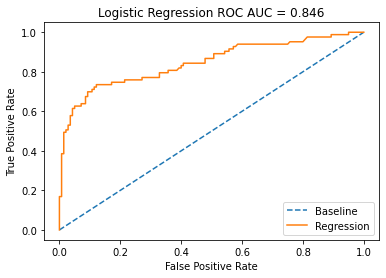

In [188]:
probs = m_lr3.predict_proba(X_val)
probs = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_val, probs)
roc_auc = roc_auc_score(y_val, probs)

# visualisation ROC AUC
plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label='Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='lower right')
plt.show()

# RandomForest vol.3

In [189]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'family_size', 'title', 'age_binned', 'big_family',
       'age_cut_middle_aged', 'age_cut_old', 'age_cut_super_old',
       'age_cut_young', 'cabin_label_B', 'cabin_label_C', 'cabin_label_D',
       'cabin_label_E', 'cabin_label_F', 'cabin_label_G', 'cabin_label_T',
       'cabin_label_n', 'fare_range_economy', 'fare_range_expensive',
       'fare_range_mega_cheap', 'fare_range_middle_priced'],
      dtype='object')

In [190]:
X = df[['Pclass', 'Sex','family_size', 'title', 'age_cut_middle_aged', 'age_cut_old', 'age_cut_super_old',
       'age_cut_young', 'cabin_label_B', 'cabin_label_C', 'cabin_label_D',
       'cabin_label_E', 'cabin_label_F', 'cabin_label_G', 'cabin_label_T',
       'cabin_label_n', 'Fare']]
y = df['Survived']

In [191]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25)

In [192]:
print(X_val.shape,y_val.shape)
print(X_train.shape,y_train.shape)

(223, 17) (223,)
(668, 17) (668,)


In [193]:
m_rf3 = RandomForestClassifier(random_state=42, n_estimators=15,max_depth=5)

In [194]:
m_rf3.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=15, random_state=42)

In [195]:
ypred_rf3 = m_rf3.predict(X_val)

In [196]:
accuracy_score(ypred_rf3,y_val)

0.8878923766816144

In [197]:
ypred_rf3 = m_rf3.predict(X_val)
print('accuracy: ', accuracy_score(y_val, ypred_rf3))
print('precision: ', precision_score(y_val, ypred_rf3))
print('recall: ', recall_score(y_val, ypred_rf3))
print('f1_score: ', f1_score(y_val, ypred_rf3))

accuracy:  0.8878923766816144
precision:  0.890625
recall:  0.76
f1_score:  0.8201438848920863


In [198]:
acc_rf = cross_val_score(m_rf3, X_train, y_train, \
                      cv=10, scoring='accuracy')
acc_rf

array([0.74626866, 0.85074627, 0.71641791, 0.8358209 , 0.92537313,
       0.8358209 , 0.88059701, 0.7761194 , 0.83333333, 0.86363636])

In [199]:
results = cross_val_score(m_rf3, X_train, y_train,cv=10) 
results.mean()

0.8264133876074174

In [200]:
results.std()

0.059985908193982064

# Submit the predictions to Kaggle

In [201]:
ypred_rf3 = m_rf3.predict(X)
submission = pd.DataFrame({"PassengerId": df.PassengerId, "Survived": ypred_rf3})
submission.to_csv('submission_titanic.csv', index=False)

In [202]:
X.head()

,Pclass,Sex,family_size,title,age_cut_middle_aged,age_cut_old,age_cut_super_old,age_cut_young,cabin_label_B,cabin_label_C,cabin_label_D,cabin_label_E,cabin_label_F,cabin_label_G,cabin_label_T,cabin_label_n,Fare
0,3,1,2,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.25
1,1,0,2,3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,71.28
2,3,0,1,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.92
3,1,0,2,3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53.10
4,3,1,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.05


Summary:

- I made a detailed EDA for the provided titanic train dataset. I started with the target column ‘Survived’. Only 342  from 891 passengers survived, from the first class survived 136 passengers(66% from total number of the 1st class passengers, where 91 female and 45 male passengers); from the second class survived  87 passengers(47% from total number of the 2nd class passengers, where 70 female and 17 male passengers); from the third class survived  119 passengers(24% from total number of the 3rd class passengers, where 72 female and 47 male passengers); 
- The average age of passengers is : 29, the maximum age of passengers is : 80, the minimum age of passengers is : less than 1 year, the average age of not survived passengers is  31 year, the average age of survived passengers is  28 years. The average age of the female passenger in the 1st class is 35,of the male - 41; the average age of the female passenger in the 2nd is 29, of the male - 31; the average age of the female passenger in the 3rd is 23, of the male - 26. The missing values in ‘Age’ column I filled with the mean age according to the 'Pclass' and 'Sex'.
- 52% of the passengers, who was alone survived. According to the info from SibSp, Parch I calculated the family size. 537 passengers were alone, 161 passengers travelled with someone, 102 passengers had 2 family members,29 passengers had 4 family members, 15 passengers 5 family members, 22 passengers had 6 family members, 12 passengers had 7 family members, 6 passengers had 8 family members, 7 passengers had 11 family members.
- Percentage of people with a recorded Cabin number who survived: 67%, percentage of people without a recorded Cabin number who survived: 30%.
- 644 passengers embarked in Southampton (S), 168 passengers embarked in Cherbourg (C), 77 passengers embarked in Queenstown (Q). I replaced the missing values with the most frequent one.
- I used the 'title' from 'Name’ column and grouped the results into five groups,"Mr", "Miss", "Mrs", "Master","Other"(based on frequency)
- Mean value of Fare is : 32.2, median value of Fare is : 14.45; I rounded the values in 'Fare'.
I calculated the min, max and mean price of the ticket, excluding the free tickets and min/max/mean price of the ticket for each class for survived/not survived passengers(e.g. the passenger with the most expensive ticket survived and with free ticket didn't)
- I deleted 'Name', 'Ticket' columns; even the correlation of 'alone' and 'family_size' is high, at the beginning I left both features to test. 

- 1 model: baseline with DummyClassifier, m_bl.score = 0.6152694610778443
- 2 model: m_lr = LogisticRegression(class_weight="balanced"),(on 'Pclass', 'Age', 'Fare', 'alone', 'cabin_number','title', 'family_size', 'SibSp', 'Parch’), accuracy:  0.8212290502793296, precision:  0.75, recall:  0.8513513513513513, f1_score:  0.7974683544303798

- New transformations:The 'Sex' and 'Embarked' columns encoded to categorical ones.I binned the imputed 'Age' column into 3 bins (young, middle-aged, old) and encoded them to categorical ones. I created a 'big_family' feature for 'family_size' <= 3. The missing values in 'cabin' I filled with 'Unknown'.I tried to use the cabin information (deck letter) and created a 'cabin_label' feature and encoded it with get_dummies.I cut the 'Fare' column into 4 equal-sized bins 'mega_cheap', 'cheap', 'middle', 'expensive' and encoded them to categorical ones . I scalled the 'Fare' column with MinMaxScaller().

- 3 model: m_lr1 = LogisticRegression(max_iter=10000),(on 'Pclass', 'Age', 'Fare', 'alone', 'cabin_number', 'title', 'Sex', 'Embarked','family_size', 'age_binned', 'big_family'), accuracy:  0.8116591928251121, precision:  0.7974683544303798, recall:  0.7078651685393258, f1_score:  0.7499999999999999

- 4 model: DecisionTreeClassifier, (on 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'alone', 'cabin_number', 'title', 'Sex', 'Embarked','family_size', 'age_binned', 'big_family'), m_dt = DecisionTreeClassifier(max_depth=5, criterion='gini’), accuracy score=0.8484848484848485

- 5 model: RandomForest, m_rf = RandomForestClassifier(max_depth=5, random_state=42, n_estimators=15), (on 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'alone', 'cabin_number', 'title', 'Sex', 'Embarked','family_size', 'age_binned', 'big_family'), accuracy:  0.8161434977578476, precision:  0.9672131147540983, recall:  0.6020408163265306, f1_score:  0.7421383647798743; crossvalidation: 0.833921302578019; StratifiedShuffleSplit: Validation accuracy scores: [0.84 0.79 0.84 0.84 0.89 0.83 0.86 0.86 0.88 0.85], mean: 0.85, std: 0.03
- Hyperparameters: Best Penalty: l2, Best C: 7.742636826811269

- 6 model: m_rf = LogisticRegression(penalty='l2', C=7.742636826811269, max_iter=1000), accuracy:  0.8059701492537313, precision:  0.7383177570093458, recall:  0.7669902912621359, f1_score:  0.7523809523809523

- 7 model: m_rf2 = RandomForestClassifier(n_estimators=15, random_state=42, max_depth=5),(on 'Pclass', 'Sex', 'Embarked', 'fare_range', 'title', 'age_binned', 'big_family','cabin_label_A', 'cabin_label_B', 'cabin_label_C', 'cabin_label_D', 'cabin_label_E','cabin_label_F', 'cabin_label_G', 'cabin_label_T', 'cabin_label_n', 'fare_range'), accuracy:  0.8295964125560538, precision:  0.8571428571428571, recall:  0.7096774193548387, f1_score:  0.7764705882352942

- 8 model: Polynomial Features, accuracy:  0.5874439461883408, precision:  0.40540540540540543, recall:  0.38461538461538464, f1_score:  0.39473684210526316

- 9 model: SVC, score=0.6736526946107785

- New changes: I cut the 'Age' column into 5 equal-sized bins ('kids', 'young', 'middle_aged', 'old','super_old') and 'Fare' into 5 bins('mega_cheap', 'cheap','economy', 'middle_priced','expensive'). I used one_hot_encoding for 'age_cut', 'cabin_label', 'fare_range'. I scalled 'Fare' with StandardScaler(). I deleted 'Cabin', 'alone', 'cabin_number','Age' columns.

- 10 model: m_lr3 = LogisticRegression(C=7.7), (on 'Pclass', 'Sex', 'family_size', 'title','age_cut_middle_aged', 'age_cut_old', 'age_cut_super_old','age_cut_young', 'cabin_label_B', 'cabin_label_C', 'cabin_label_D','cabin_label_E', 'cabin_label_F', 'cabin_label_G', 'cabin_label_T','cabin_label_n', 'Fare'), accuracy:  0.8385650224215246, precision:  0.7444444444444445, recall:  0.8375, f1_score:  0.788235294117647

- 11 model: m_rf3 = RandomForestClassifier(random_state=42, n_estimators=15,max_depth=5), (on 'Pclass', 'Sex','family_size', 'title', 'age_cut_middle_aged', 'age_cut_old', 'age_cut_super_old','age_cut_young', 'cabin_label_B', 'cabin_label_C', 'cabin_label_D','cabin_label_E', 'cabin_label_F', 'cabin_label_G', 'cabin_label_T','cabin_label_n', 'Fare'), accuracy:  0.8789237668161435(BEST SCORE), precision:  0.8666666666666667, recall:  0.7926829268292683, f1_score:  0.8280254777070064; crossvalidation score= 0.8145183175033921